# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
# Importing packages
import pandas as pd
pd.set_option('display.max_columns', 40)
import requests
import json

In [2]:
# Loading the twitter-archive dataset
rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Using the requests library to download the tweet image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
# Load the file into a dataframe using pandas
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = rate_dogs.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [8]:
# Additional data via the Twitter API 
with open("tweet-json.txt")as file:
    lines = file.readlines()
tweets_json = []
for line in lines:
    tweets_json.append(json.loads(line))
# Load the file into a dataframe using pandas
tweets = pd.DataFrame(tweets_json)

## Assessing Data

In [9]:
rate_dogs.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
# Summary Information
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
rate_dogs.drop(['source','text', 'expanded_urls'], axis=1, inplace=True)

In [12]:
# Summary statistics
rate_dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Checking rating_denominator column
denomiators = rate_dogs[['rating_numerator','rating_denominator']]
denomiators = denomiators[denomiators['rating_denominator'] != 10]
denomiators

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [14]:
# Viewing image_prediction data
images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [15]:
# Summary Information
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Summary statistics
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
# Viewing Twitter API data
tweets.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
253,Wed Mar 22 16:04:20 +0000 2017,844580511645339650,844580511645339650,This is Charlie. He wants to know if you have ...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 844580505345511424, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3533,17871,False,False,False,False,en,NaN,NaN,NaN,NaN
1474,Sun Jan 31 03:00:47 +0000 2016,693629975228977152,693629975228977152,This pupper is afraid of its own feet. 12/10 w...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 693629966060228610, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,894,2685,False,False,False,False,en,NaN,NaN,NaN,NaN
2151,Wed Nov 25 23:39:47 +0000 2015,669661792646373376,669661792646373376,This is a brave dog. Excellent free climber. T...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669661788376580096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,482,860,False,False,False,False,en,NaN,NaN,NaN,NaN


In [18]:
# Summary statistics
tweets.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [19]:
# Summary Information
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Quality issues
##### `rate_dogs` table

> 1. Inconsitency with rating_denominators

> 2. Rating of dogs ought to be scaled in a single column instead of having numerator and denominator separately

> 3. Renaming the `name` column as `dog_name` for better description

> 4. Extreme values in ratings both for numerators and denominators suggesting outliers

> 5. Erroneous data type for most column names    

##### `tweets` table

> 6. Drop unnecessary columns

> 7. Unmatching column name that will prevent merging of `tweet-json.txt` and `twitter-archive-enhanced` dataset (i.e id instead of tweet_id)

> 8. Erroneous data type for id column 
 

### Tidiness issues
> 1. All four values `doggo`,`floofer`,`pupper`,`puppo` ought to be in one column `dog_stage` from the 'twitter-archive-enhanced' dataset

> 2. All three datasets should be represented as one single dataset

## Cleaning Data

In [20]:
# Make copies of original pieces of data
rate_dogs_clean = rate_dogs.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

### Issue #1: Dog stages in different columns

#### Define: All four values `doggo`,`floofer`,`pupper`,`puppo` ought to be in one column `dog_stage` from the 'rate_dogs' table, applying string concat method and renaming the different stages (tidiness issue)

#### Code

In [21]:
rate_dogs_clean['dog_stage'] = rate_dogs_clean['doggo'].str.cat(rate_dogs_clean[['floofer','pupper','puppo']], sep='-')

In [22]:
rate_dogs_clean['dog_stage'].value_counts()

None-None-None-None        1976
None-None-pupper-None       245
doggo-None-None-None         83
None-None-None-puppo         29
doggo-None-pupper-None       12
None-floofer-None-None        9
doggo-None-None-puppo         1
doggo-floofer-None-None       1
Name: dog_stage, dtype: int64

In [23]:
rate_dogs_clean['dog_stage'] = rate_dogs_clean['dog_stage'].map({'None-None-None-None':'Stage_0', 'None-None-pupper-None':'Stage_3', 'doggo-None-None-None':'Stage_1',
                                 'None-None-None-puppo':'Stage_4','doggo-None-pupper-None':'Stage_1_3', 'None-floofer-None-None':'Stage_2',
                                 'doggo-None-None-puppo':'Stage_1_4', 'doggo-floofer-None-None':'Stage_1_2'})

In [24]:
rate_dogs_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [25]:
rate_dogs_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage
612,796904159865868288,NaN,NaN,2016-11-11 02:35:32 +0000,6.873173e+17,4.196984e+09,2016-01-13 16:56:30 +0000,11,10,Tyrone,Stage_0
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,NaN,NaN,NaN,9,10,Ruby,Stage_0
1283,708711088997666817,NaN,NaN,2016-03-12 17:47:45 +0000,NaN,NaN,NaN,11,10,Smokey,Stage_0


In [26]:
rate_dogs_clean.shape

(2356, 11)

### Quality

### Issue #2: Inconsitency with rating_denominators

#### Define: Filtering columns with denominator equal to 10

#### Code

In [27]:
rate_dogs_clean = rate_dogs_clean[rate_dogs_clean['rating_denominator'] == 10]

#### Test

In [28]:
rate_dogs_clean[rate_dogs_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage


In [29]:
rate_dogs_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.333000e+03,7.300000e+01,7.300000e+01,1.800000e+02,1.800000e+02,2333.000000,2333.0
mean,7.429280e+17,7.456060e+17,2.152128e+16,7.722159e+17,1.248597e+16,12.237462,10.0
std,6.869187e+16,7.600519e+16,1.294404e+17,6.249820e+16,9.625580e+16,41.022472,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0
25%,6.783802e+17,6.754971e+17,3.589728e+08,7.171759e+17,4.196984e+09,10.000000,10.0
50%,7.200432e+17,7.044857e+17,4.196984e+09,7.805335e+17,4.196984e+09,11.000000,10.0
75%,7.997580e+17,8.233264e+17,4.196984e+09,8.204234e+17,4.196984e+09,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0


### Issue #3: Dogs Rating 

#### Define: Rating of dogs by scaling the numerator and denominator columnn into one as percentage then drop the rating numerator and denominator columnn

#### Code

In [30]:
rate_dogs_clean['rating(%)'] = round(((rate_dogs_clean['rating_numerator']/rate_dogs_clean['rating_denominator'])*100),0)

In [31]:
rate_dogs_clean.drop(['rating_numerator', 'rating_denominator' ], axis=1, inplace=True)

#### Test

In [32]:
rate_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'name', 'dog_stage', 'rating(%)'],
      dtype='object')

In [33]:
rate_dogs_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,dog_stage,rating(%)
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,NaN,NaN,NaN,Phineas,Stage_0,130.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,NaN,NaN,NaN,Tilly,Stage_0,130.0


### Issue #4: Renaming column name

#### Define: Renaming the 'name' column as 'dog_name' using the .rename() method

#### Code

In [34]:
rate_dogs_clean.rename(columns={'name':'dog_name'}, inplace=True)

#### Test

In [35]:
rate_dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'dog_name', 'dog_stage', 'rating(%)'],
      dtype='object')

### Issue #5: Extreme values in ratings(%) suggesting outliers in the `twitter-archive-enhanced` dataset

#### Define: Using the interquartile range method for obtaining extreme values and dropping them

#### Code

In [36]:
import numpy as np
from scipy.stats import iqr
np.quantile(rate_dogs_clean['rating(%)'], [0, 0.25, 0.5, 0.75, 0.99, 1])

array([    0.,   100.,   110.,   120.,   140., 17760.])

In [37]:
# Finding outliers
import numpy as np
from scipy.stats import iqr
iqr = iqr(rate_dogs_clean['rating(%)'])
upper_threshold = np.quantile(rate_dogs_clean['rating(%)'], 0.99) + 1.5 * iqr

In [38]:
# printing the upper threshold
outliers = rate_dogs_clean[rate_dogs_clean['rating(%)'] > upper_threshold].index
outliers

Int64Index([188, 189, 290, 340, 695, 763, 979, 1712, 2074], dtype='int64')

In [39]:
rate_dogs_clean.drop(outliers, axis=0, inplace = True)

#### Test

In [40]:
rate_dogs_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating(%)
count,2.324000e+03,7.000000e+01,7.000000e+01,1.790000e+02,1.790000e+02,2324.000000
mean,7.427723e+17,7.411339e+17,2.244362e+16,7.721349e+17,1.255572e+16,107.069707
std,6.865291e+16,7.437209e+16,1.321450e+17,6.266404e+16,9.652124e+16,21.797652
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000
25%,6.783394e+17,6.753863e+17,1.294955e+09,7.157203e+17,4.196984e+09,100.000000
50%,7.196279e+17,7.031489e+17,4.196984e+09,7.804657e+17,4.196984e+09,110.000000
75%,7.993373e+17,8.127522e+17,4.196984e+09,8.205322e+17,4.196984e+09,120.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,170.000000


### Issue #6: Erroneous data type for most column names in the dataset**

#### Define: Convert to the right datatype usig .astype() method, `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` to categorical data types and `timestamp`, `retweeted_status_timestamp` to datetime

#### Code

In [41]:
# To category
rate_dogs_clean.tweet_id = rate_dogs_clean.tweet_id.astype('category')
rate_dogs_clean.in_reply_to_status_id = rate_dogs_clean.in_reply_to_status_id.astype('category')
rate_dogs_clean.in_reply_to_user_id = rate_dogs_clean.in_reply_to_user_id.astype('category')
rate_dogs_clean.retweeted_status_id = rate_dogs_clean.retweeted_status_id.astype('category')
rate_dogs_clean.retweeted_status_user_id = rate_dogs_clean.retweeted_status_user_id.astype('category')

# To datetime
rate_dogs_clean.timestamp = pd.to_datetime(rate_dogs_clean.timestamp)
rate_dogs_clean.retweeted_status_timestamp = pd.to_datetime(rate_dogs_clean.retweeted_status_timestamp)

#### Test

In [42]:
rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2324 non-null   category           
 1   in_reply_to_status_id       70 non-null     category           
 2   in_reply_to_user_id         70 non-null     category           
 3   timestamp                   2324 non-null   datetime64[ns, UTC]
 4   retweeted_status_id         179 non-null    category           
 5   retweeted_status_user_id    179 non-null    category           
 6   retweeted_status_timestamp  179 non-null    datetime64[ns, UTC]
 7   dog_name                    2324 non-null   object             
 8   dog_stage                   2324 non-null   object             
 9   rating(%)                   2324 non-null   float64            
dtypes: category(5), datetime64[ns, UTC](2), float64(1), object(2

### Issue #7: Unnecessary columns

#### Define: Filter colums to be used for analysis such as  'id', 'retweet_count', and 'favorite_count'

#### Code: 

In [43]:
tweets_clean = tweets_clean[['id', 'retweet_count', 'favorite_count']]

### Issue #8: Unmatching column name that will prevent merging of rate_dogs with tweets table

#### Define: Remaning the unmatching column name that will prevent merging of `tweets` and `rate_dogs` table (i.e id instead of tweet_id)

#### Code

In [44]:
tweets_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [45]:
tweets_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #9: Erroneous data type for id column

#### Define: Convert tweet_id column to categorical datatype 

#### Code

In [46]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype('category')

#### Test

In [47]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2354 non-null   category
 1   retweet_count   2354 non-null   int64   
 2   favorite_count  2354 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 124.4 KB


### Issue #10(Tidiness): Datasets in different tables

#### Define: Merge three datasets into one master dataset

#### Code

In [48]:
rate_dogs_clean = pd.merge(rate_dogs_clean, tweets_clean,
                            on=['tweet_id'], how='left')

In [49]:
rate_dogs_clean = pd.merge(rate_dogs_clean, images_clean,
                            on=['tweet_id'], how='left')

#### Test

In [50]:
rate_dogs_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,NaN,NaN,NaT,Phineas,Stage_0,130.0,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,NaN,NaN,NaT,Tilly,Stage_0,130.0,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,NaN,NaN,NaT,Archie,Stage_0,120.0,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,NaN,NaN,NaT,Darla,Stage_0,130.0,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,NaN,NaN,NaT,Franklin,Stage_0,120.0,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
rate_dogs_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [52]:
twitter_df = pd.read_csv('twitter_archive_master.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,Phineas,Stage_0,130.0,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,NaN,NaN,NaN,Tilly,Stage_0,130.0,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,NaN,NaN,NaN,Archie,Stage_0,120.0,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,NaN,NaN,NaN,Darla,Stage_0,130.0,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,NaN,NaN,NaN,Franklin,Stage_0,120.0,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,NaN,NaN,NaN,None,Stage_0,50.0,41.0,111.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2320,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,NaN,NaN,NaN,a,Stage_0,60.0,147.0,311.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2321,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,NaN,NaN,NaN,a,Stage_0,90.0,47.0,128.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2322,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,NaN,NaN,NaN,a,Stage_0,70.0,48.0,132.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


##### Splitting timestamp into days, month and year

In [53]:
# using split
twitter_df[['tweet_year','tweet_month','tweet_day']] = twitter_df['timestamp'].str.split('-', expand=True)

In [54]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_name,dog_stage,rating(%),retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_year,tweet_month,tweet_day
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,Phineas,Stage_0,130.0,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017,08,01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,NaN,NaN,NaN,Tilly,Stage_0,130.0,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017,08,01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,NaN,NaN,NaN,Archie,Stage_0,120.0,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017,07,31 00:18:03+00:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,NaN,NaN,NaN,Darla,Stage_0,130.0,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017,07,30 15:58:51+00:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,NaN,NaN,NaN,Franklin,Stage_0,120.0,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017,07,29 16:00:24+00:00


In [55]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2324 non-null   int64  
 1   in_reply_to_status_id       70 non-null     float64
 2   in_reply_to_user_id         70 non-null     float64
 3   timestamp                   2324 non-null   object 
 4   retweeted_status_id         179 non-null    float64
 5   retweeted_status_user_id    179 non-null    float64
 6   retweeted_status_timestamp  179 non-null    object 
 7   dog_name                    2324 non-null   object 
 8   dog_stage                   2324 non-null   object 
 9   rating(%)                   2324 non-null   float64
 10  retweet_count               2322 non-null   float64
 11  favorite_count              2322 non-null   float64
 12  jpg_url                     2052 non-null   object 
 13  img_num                     2052 

In [56]:
twitter_df['tweet_year'] = twitter_df['tweet_year'].astype(int)
twitter_df['tweet_month'] = twitter_df['tweet_month'].astype(int)

### Research Question 1: What month and year do we have the highest and lowest tweets?

#### Tweets by month and year

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,4)})

In [58]:
twitter_df['tweet_month'] = twitter_df['tweet_month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

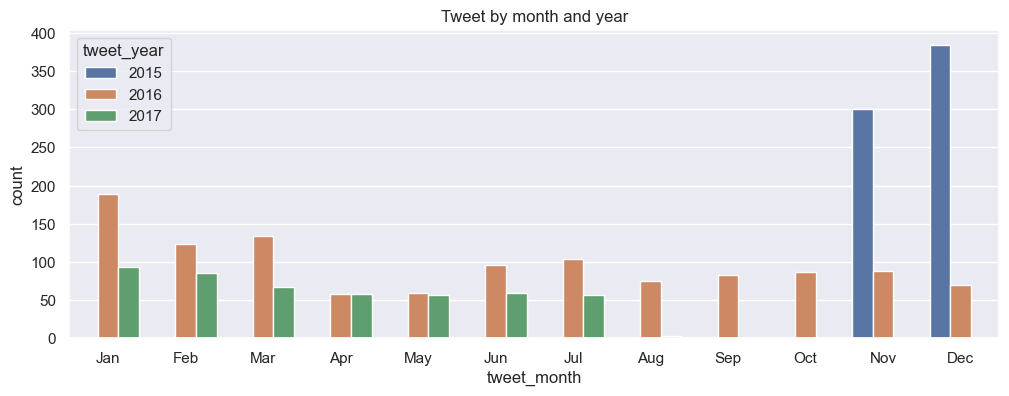

In [59]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x='tweet_month', hue="tweet_year", order=month_names, data=twitter_df).set_title('Tweet by month and year');

### Research Question 2: Which dogs have the highest average ratings?

#### Checking average dog rates by dog name

In [60]:
dog_rate_df = twitter_df[['dog_name', 'dog_stage', 'rating(%)','retweet_count', 'favorite_count',]]
rating = dog_rate_df.groupby('dog_name').mean()['rating(%)'].sort_values(ascending=False).head(15)
rating

C:\Users\user\AppData\Local\Temp\ipykernel_17280\1522286353.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating = dog_rate_df.groupby('dog_name').mean()['rating(%)'].sort_values(ascending=False).head(15)


dog_name
Laika        140.0
Clifford     140.0
Cermet       140.0
Doobert      140.0
Iggy         140.0
Emmy         140.0
General      140.0
Sundance     140.0
Smiley       140.0
such         140.0
Kuyu         140.0
Beya         130.0
Rumpole      130.0
Tonks        130.0
Shnuggles    130.0
Name: rating(%), dtype: float64

In [61]:
twitter_df[twitter_df['dog_name'] == 'Charlie'][['dog_name','jpg_url']]

,dog_name,jpg_url
228,Charlie,NaN
252,Charlie,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg
259,Charlie,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg
322,Charlie,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg
334,Charlie,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg
377,Charlie,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg
802,Charlie,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg
920,Charlie,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg
1337,Charlie,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg
1414,Charlie,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg


<AxesSubplot: title={'center': 'Top Fifteen dog_names with average rating(%)'}, xlabel='Average_Rating', ylabel='Dog_Names'>

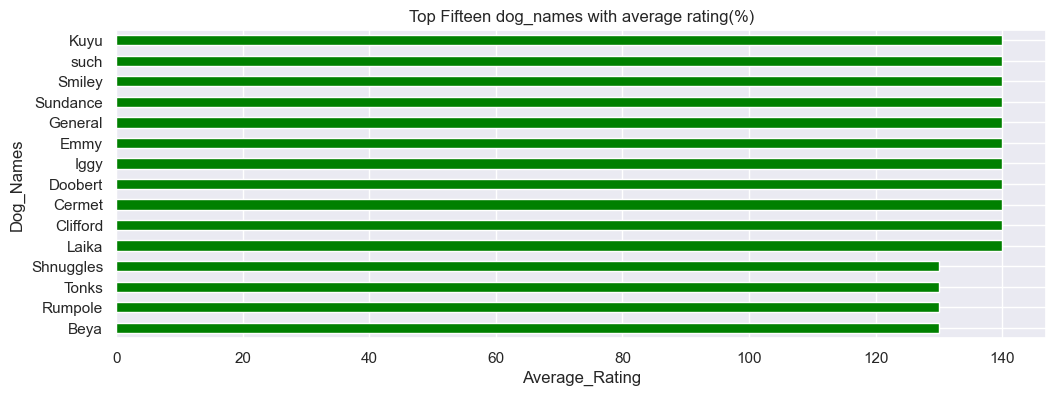

In [62]:
rating.sort_values(ascending=True).plot(kind='barh',color='green', title='Top Fifteen dog_names with average rating(%)', xlabel='Average_Rating', ylabel='Dog_Names')

### Research Question 3: Which dog has the highest retweets and likes(favorite) count?

#### Visualizing Retweet counts and Favourite counts

In [63]:
# Checking the number of dogs with missing names
twitter_df.groupby('dog_name').sum()[['retweet_count','favorite_count']].sort_values(by='retweet_count').tail(5)

C:\Users\user\AppData\Local\Temp\ipykernel_17280\2620778936.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twitter_df.groupby('dog_name').sum()[['retweet_count','favorite_count']].sort_values(by='retweet_count').tail(5)


,retweet_count,favorite_count
dog_name,,
Sunny,68005.0,89475.0
Buddy,75752.0,77940.0
Stephan,113250.0,107015.0
Bo,124561.0,185922.0
None,2357894.0,5294495.0


In [64]:
# Filtering dog_names not missing
dog_name_df = dog_rate_df[dog_rate_df['dog_name'] != 'None']

C:\Users\user\AppData\Local\Temp\ipykernel_17280\1176255557.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dog_name_df.groupby('dog_name').sum()['retweet_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_17280\1176255557.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dog_name_df.groupby('dog_name').sum()['favorite_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[1])


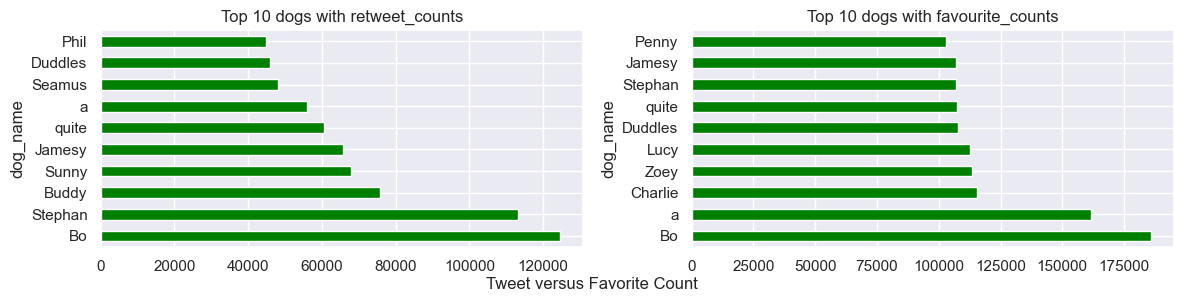

In [65]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

dog_name_df.groupby('dog_name').sum()['retweet_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[0])
dog_name_df.groupby('dog_name').sum()['favorite_count'].sort_values(ascending=False).head(10).plot(kind='barh', color='green', ax=axes[1])
 
axes[0].set_title('Top 10 dogs with retweet_counts')
axes[1].set_title('Top 10 dogs with favourite_counts')

fig.text(0.5, 0.01, 'Tweet versus Favorite Count', ha='center')
plt.tight_layout()

### Insights:
> 1. From the countplot showing tweets by year and month it can be observed that the WeRateDog tweets campaign had it highest engagement the the second month of it's commencment(i.e Dec 2015)and the lowest in the last month of the campaign (July 2017)

> 2. There seems to be a high level of tie in the dog average ratings suggesting the dogs are quite wonderful

> 3. There's a level of relationships between sum of retweet and favourite counts, with dog Bo having the highest sum in both the retweet and favorite count. Also a large sum of dog names were missing.

### Rersearch Question 4: What type of relationhip do we have between the retweet and favorite count?

### Visualization

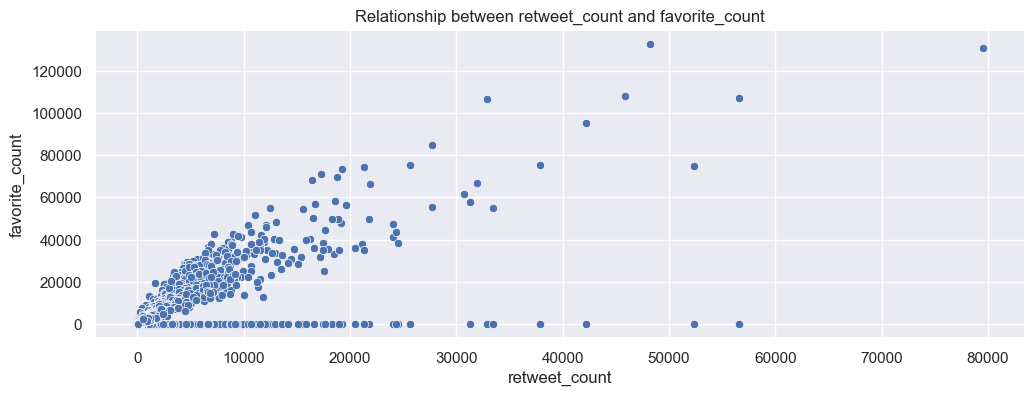

In [66]:
sns.scatterplot(twitter_df,x='retweet_count',y='favorite_count').set(title='Relationship between retweet_count and favorite_count');

In [67]:
# Checking the relationship between retweet and favorite count
twitter_df['retweet_count'].corr(twitter_df['favorite_count'])

0.7026660579452872


#### Conclusion: A dog with greater retweets tends to have greater likes(favorite as well)